Dataset: https://www.kaggle.com/datasets/shreenidhihipparagi/google-stock-prediction

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, GRU

In [22]:
df = pd.read_csv("GOOG.csv")
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


In [23]:
data = df['close'].values.reshape(-1,1)

In [24]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

In [26]:
def create_sequences(data, time_steps=60):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i-time_steps:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

time_steps = 60
X, y = create_sequences(scaled_data, time_steps)

In [27]:
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [28]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (958, 60, 1) (958,)
Test shape: (240, 60, 1) (240,)


In [30]:
rnn_model = Sequential([
    SimpleRNN(50, return_sequences=False, input_shape=(X_train.shape[1], 1)),
    Dense(1)])

In [31]:
rnn_model.compile(optimizer='adam', loss='mse')

In [32]:
history_rnn = rnn_model.fit(X_train, y_train,epochs=30, batch_size=32,validation_data=(X_test, y_test),verbose=1)

Epoch 1/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 70ms/step - loss: 0.0221 - val_loss: 0.0635
Epoch 2/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 9.8232e-04 - val_loss: 0.0322
Epoch 3/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 5.7991e-04 - val_loss: 0.0200
Epoch 4/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 4.8473e-04 - val_loss: 0.0146
Epoch 5/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.6216e-04 - val_loss: 0.0134
Epoch 6/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 4.2679e-04 - val_loss: 0.0107
Epoch 7/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 3.8030e-04 - val_loss: 0.0101
Epoch 8/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 3.5942e-04 - val_loss: 0.0096
Epoch 9/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 3.3905e-04 - val_loss: 0.0074
Epoch 10/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 3.3240e-04 - val_loss: 0.0065
Epoch 11/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.9198e-04 - val_loss: 0.0059
Epoch 12/30
30/30 ━━━━━

In [33]:
gru_model = Sequential([
    GRU(64, activation='tanh', return_sequences=False, input_shape=(X_train.shape[1], 1)),
    Dense(1)])

In [34]:
gru_model.compile(optimizer='adam', loss='mse')

In [35]:
history_gru = gru_model.fit(X_train, y_train,epochs=30, batch_size=32,validation_data=(X_test, y_test),verbose=1)

Epoch 1/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 12s 81ms/step - loss: 0.0154 - val_loss: 0.0775
Epoch 2/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0028 - val_loss: 0.0263
Epoch 3/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 7.5154e-04 - val_loss: 9.1583e-04
Epoch 4/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 2.4613e-04 - val_loss: 7.1359e-04
Epoch 5/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 2.2083e-04 - val_loss: 6.7466e-04
Epoch 6/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 2.1259e-04 - val_loss: 6.4312e-04
Epoch 7/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 2.0607e-04 - val_loss: 6.6645e-04
Epoch 8/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 2.0149e-04 - val_loss: 5.8837e-04
Epoch 9/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 1.9348e-04 - val_loss: 6.1436e-04
Epoch 10/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 1.9277e-04 - val_loss: 6.0148e-04
Epoch 11/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 1.8304e-04 - val_loss: 5

In [54]:
rnn_pred = rnn_model.predict(X_test)
gru_pred = gru_model.predict(X_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step  
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [55]:
rnn_pred = scaler.inverse_transform(rnn_pred)
gru_pred = scaler.inverse_transform(gru_pred)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1,1))

In [56]:
rmse_rnn = np.sqrt(mean_squared_error(y_test_rescaled, rnn_pred))
rmse_gru = np.sqrt(mean_squared_error(y_test_rescaled, gru_pred))
print("SimpleRNN RMSE:", rmse_rnn)
print("GRU RMSE:", rmse_gru)

SimpleRNN RMSE: 85.26312996107147
GRU RMSE: 51.308480947502666


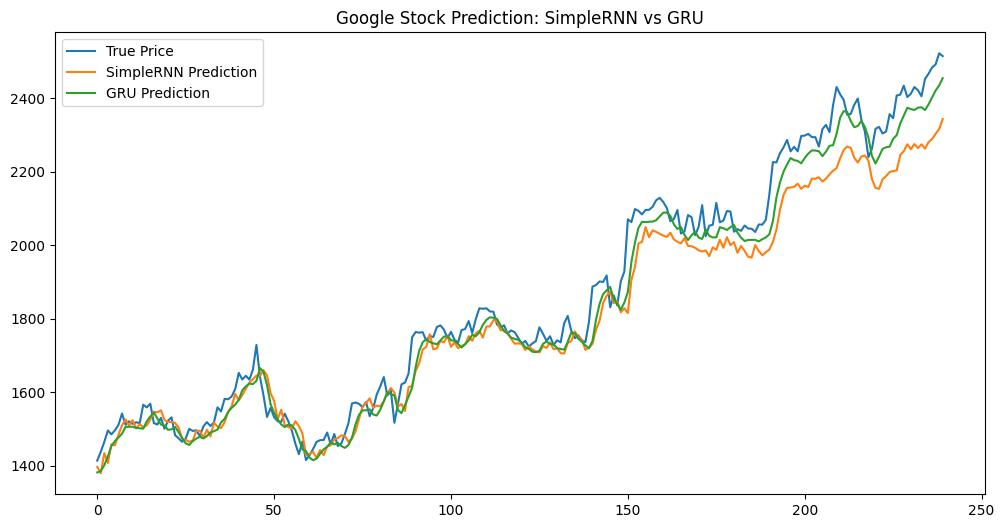

In [57]:
plt.figure(figsize=(12,6))
plt.plot(y_test_rescaled, label="True Price")
plt.plot(rnn_pred, label="SimpleRNN Prediction")
plt.plot(gru_pred, label="GRU Prediction")
plt.legend()
plt.title("Google Stock Prediction: SimpleRNN vs GRU")
plt.show()
